### Problem 1

**a)**

The total mass within radius r is given by the integral

$$M(<r) = \int_0^r \rho(r)4\pi r^2 dr \\
= \int_0^r \frac{M r_J^4}{4 \pi r_J^3 r^2 (r+r_J)^2} 4 \pi r^2 dr \\
=\frac{M}{r_J} \int_0^r \frac{1}{(\frac{r}{r_J}+1)^2} dr \\
= M \int_0^r \frac{1}{(\frac{r}{r_J}+1)^2} d(\frac{r}{r_J}+1) \\
= M\int_1^{\frac{r}{r_J}+1} \frac{1}{y^2} dy \\
= M(-\frac{1}{y}|_1^{\frac{r}{r_J}+1}) \\
= \frac{M r}{r+r_J} $$

where we use change of variable $y = \frac{r}{r_J}+1$

when r goes to $\infty$(r>>r$_J$), we get the total mass of $M_{tot} = \frac{M r}{r} = M$.

**b)**

i)

From poisson's equation

$$\nabla^2 \Phi = 4 \pi G \rho = \frac{G M r_J}{r^2 (r+r_J)^2}$$
From symmetry we know that $Phi = \Phi(r)$. So Laplacian equation simplifies to 
$$ \frac{1}{r}\frac{\partial^2}{\partial r^2}(r \Phi) = \frac{G M r_J}{r^2 (r+r_J)^2} 
$$
$$\frac{\partial^2}{\partial r^2}(r \Phi)= \frac{G M r_J}{r (r+r_J)^2} = GM(\frac{1}{r_J r}-\frac{1}{r_J (r+r_J)} -\frac{1}{(r+r_J)^2}
$$
Integral for the first time gives 
$$
\frac{\partial}{\partial r}(r \Phi) = GM\frac{1}{r_J}ln(\frac{r}{r+r_J})+\frac{1}{r+r_J}
$$
$$
r \Phi = GM(\frac{r}{r_J}\ln(\frac{r}{r+r_J}))
$$
So we get 
$$
\Phi = \frac{GM}{r_J}\ln(\frac{r}{r+r_J})
$$

ii)

The gravitational force is 

$$
F = -\frac{GM(<r)}{r^2} = -\frac{G M }{r(r+r_J)}
$$

Assuming gravitational potential to be 0 at infinity, the gravitational potential is hence 

$$
\Phi = \int_r^\infty F dr \\
= -\frac{GM}{r_J}\int_r^\infty (\frac{1}{r}-\frac{1}{r+r_J})dr \\
= -\frac{GM}{r_J}\ln(\frac{r}{r+r_J})|_r^\infty \\
= \frac{GM}{r_J}\ln(\frac{r}{r+r_J})
$$

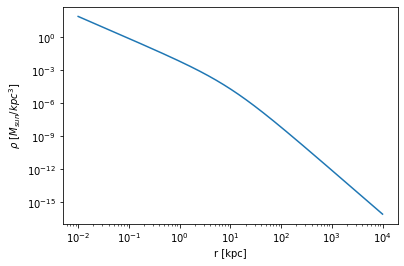

In [30]:
# example density profile plotted in log-log space. 
# We see that the density profile is approximately r^{-2} at small r(<r_J) and approximately r^{-4} at large r(>r_J).

M = 1
rj = 10
r = np.logspace(-2,4,1000)
rho = M*rj/4/np.pi/r**2/(r+rj)**2
plt.loglog(r,rho)
plt.xlabel('r [kpc]');plt.ylabel(r'$\rho$ [$M_{sun}/kpc^3$]')
plt.show()

**c)**

From Newtonina mechanics, the gravitational force is balanced by centrifugal force

$$F = \frac{GM(<r)}{r^2} = \frac{v_c^2}{r}$$
so
$$\frac{GM}{r(r+r_J)} = \frac{v_c^2}{r}$$
From which we get the rotation curve
$$
v_c = \sqrt{\frac{GM}{r+r_J}}
$$
For r<<r_J, $v_c \approx \frac{GM}{r_J} = const $

For r>>r_J, $v_c \approx \frac{GM}{r} \sim r^{-\frac{1}{2}}  $

**d)**

For a typical disk galaxy, the density profile is approximately $\sim r^{-2}$ at small r and $\sim r^{-4}$ at large r.

The rotation curve is approximately $v_c = \text{const}$ at small r  and $\sim r^{-\frac{1}{2}}$ at large r.

From above calculation of rotation curve and density profile we see that this model is consistent with both the density profile and rotation curve of real galaxy. 

### Problem 2

Below is the numerical code in assignment 1.

In [1]:
import numpy as np; import matplotlib.pyplot as plt
import astropy.constants as c; import astropy.units as u
from scipy.optimize import bisect;from scipy.integrate import odeint

In [33]:
tau = (0.01*u.kpc/u.km*u.s).to(u.Myr)
tau

<Quantity 9.77792222 Myr>

In [84]:
# parameter
vt = 1; vr=0.5 
V = 2 # velocity in 100 km/s
r0 = 10 #in kpc

t = np.linspace(0, 33, 10001)

#inital condition 
y0 = [r0, vr, 0, vt/r0]

def orbit(y, t, V):
    r,v,phi,omega = y
    dydt = [v, r*omega**2-V**2/r, omega, -2*v*omega/r]
    return dydt


y = odeint(orbit, y0, t, args=(V,))

r = y[:,0]; v = y[:,1]; phi = y[:,2]

In [85]:
index = np.where(abs(r-np.max(r))<0.000003)
print('index of apogalactica:',index)
print('these index correspond to time of:',t[index])
print('these index correspond to angle of:',phi[index])

index of apogalactica: (array([ 509,  510,  511, 5167, 5168, 9824, 9825, 9826], dtype=int64),)
these index correspond to time of: [ 1.6797  1.683   1.6863 17.0511 17.0544 32.4192 32.4225 32.4258]
these index correspond to angle of: [0.15902576 0.15932971 0.15963366 4.47425869 4.47456263 8.78918785
 8.78949179 8.78979574]


**a)**

From assignment 1, we get the angular velocity of the rotating frame by dividing the angular distance between successive apogalactica.
by the time it takes between successive apogalactica. The orbit in this rotating frame will looks like a closed orbit.

I plotted the simple closed orbit below.

The period of rotating frame is that 150.30 Myr


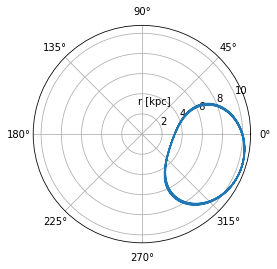

In [83]:
# period of closed orbit
T_r = 17.0544-1.683
print('The period of rotating frame is that %.2f Myr'%(T_r*tau.value))
w = 4.32/T_r
plt.polar(phi-w*t, r)
rlab = plt.text(8,3,"r [kpc]")

**b)**

i) The shape of the orbit likes a bean. Its radial range lie between the minimum and maximum values of r that I calculated for question 1a of assignment 1.


ii) 
The period of closed orbit is just the time seperation between two successive apogalactica 
$T_r = (17.0544 - 1.683)\cdot\tau = 150.30 Myr$ where $\tau$ is the scale length time of our code.

For potential of $\Phi = V^2 \ln(r)$
In epicyclic circle the gravtitational force is balanced with centrifugal force 
$a = -\frac{d\Phi}{d r}= -\frac{V^2}{r} = a_{c} = -\Omega^2 r = \frac{v^2}{r}$, 

therefore we get
$\Omega = \frac{V}{r}$ and $v=V$

From lecture note we know that if $\Omega \propto 1/r$, then $\kappa=\sqrt{2} \Omega$

With the same angular momentum $L = rv = rV$, we also know that $\Omega = \frac{V}{r} = \frac{V^2}{L}$

$$
\kappa_{epi} = \sqrt{2} \Omega = \sqrt{2} \frac{V^2}{L}
$$

The period of a small epicyclic oscillation with the same angular momentum is hence
$T_{epi} = \frac{2 \pi}{\kappa_{epi}} = 108.60 Myr$

The ratio of period is hence $T_r/T_{epi} = 1.38$

**c)**

For a nearly circular orbit with the same angular momentum given by $L = r_{cir}V$

We get:
$r_{cir} = \frac{L}{V} = 5kpc$, which lies within the closed orbit that I have just plotted.



In [21]:
w_epi = np.sqrt(2)*V**2/L/tau
T_epi = 2*np.pi/w_epi
T_epi

<Quantity 108.60540947 Myr>

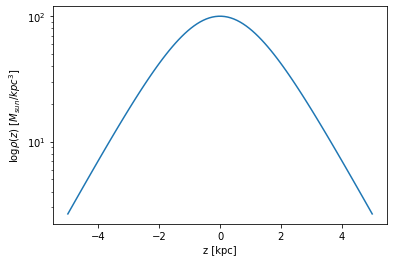

In [10]:
# Plot in ass4
hz = 2 # in kpc
rho_0 = 100 #

z = np.linspace(-5,5,100)
yita = z/hz
rho = rho_0/np.cosh(yita)**2
plt.semilogy(z, rho)
plt.xlabel('z [kpc]');plt.ylabel(r'$\log \rho(z)$ [$M_{sun}/kpc^3$]')
plt.savefig('ass4_plot.pdf')